<a href="https://colab.research.google.com/github/VishalRavichandran27/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**

I want to develop a dataset that helps in predicting Ejection Fraction in ICU patients. Overweight and diabetes can affect ejection fraction (EF), a measurement of the heart's pumping efficiency. Diabetes can cause diabetic cardiomyopathy, which can lower EF and damage the heart muscle as a result of long-term, uncontrolled blood sugar levels. Diabetes can also result in microvascular damage that affects heart function. Conversely, overweight increases the workload on the heart, which may have an impact on EF. Furthermore, diabetes, high blood pressure, and high cholesterol are frequently associated with overweight; these factors alone or in combination can lead to heart health problems that can affect EF. In order to minimize the negative effects of diabetes and overweight on heart function and EF, it is essential to manage these conditions by dietary adjustments and medical care. Regular EF monitoring also helps to evaluate the cardiac health of these patients.


I have seen many datasets but there were lack of some important variables. So I want to merge datasets to obtain important variables where my model may do good predictions.

**About the Datasets**
1. 500 Person Gender-Height-Weight-Body Mass Index. (n.d.). 500 Person Gender-Height-Weight-Body Mass Index | Kaggle.
(https://www.kaggle.com/datasets/yersever/500-person-gender-height-weight-bodymassindex) This dataset has 500 people's gender, height and Weight. The body mass index is calculated. The important column is body mass index from this dataset.

2. Heart Disease Dataset. (n.d.). Heart Disease Dataset | Kaggle.
(https://www.kaggle.com/datasets/yasserh/heart-disease-dataset) This database contains 76 attributes, some of them are patient's cholesterol level, Patient's Resting ECG Levels, Patient's Gender, etc. The main column 'target' refers to the presence of heart disease in the patient.

3. Diabetes UCI Dataset. (n.d.). Diabetes UCI Dataset | Kaggle.
(https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset) Dataset has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor. This dataset has attributes like itching, muscle stiffness, etc. This has 17 columns in total.

4. ICU heart patient.
(https://datadryad.org/stash/dataset/doi:10.5061/dryad.0p2ngf1zd)
This a publicly available critical care database containing de-identified data on 46,520 patients and 58,976 admissions to the ICU of the Beth Israel Deaconess Medical Center, Boston, USA, between 1 June, 2001 and 31 October, 2012.





# The below code is used so that we can perform the functions that are required for prediction.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The below code is used to read the csv file for performing the following function.

In [53]:
measuring = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
measuring.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


# This code is the formula for finding the BMI and i have multiplied with 0.01 because to convert the height in centimeters to meters and rounded it to one.

In [54]:
measuring['Bmi'] = round(measuring['Weight']/(measuring['Height']*0.01)**2,1)

In [55]:
measuring

,Gender,Height,Weight,Index,Bmi
0,Male,174,96,4,31.7
1,Male,189,87,2,24.4
2,Female,185,110,4,32.1
3,Female,195,104,3,27.4
4,Male,149,61,3,27.5
...,...,...,...,...,...
495,Female,150,153,5,68.0
496,Female,184,121,4,35.7
497,Female,141,136,5,68.4
498,Male,150,95,5,42.2


# I have used this code to drop the column called index which is not required for the prediction.

In [56]:
measuring = measuring.drop(columns = ['Index'])

In [57]:
measuring

,Gender,Height,Weight,Bmi
0,Male,174,96,31.7
1,Male,189,87,24.4
2,Female,185,110,32.1
3,Female,195,104,27.4
4,Male,149,61,27.5
...,...,...,...,...
495,Female,150,153,68.0
496,Female,184,121,35.7
497,Female,141,136,68.4
498,Male,150,95,42.2


# Here i have filtered data by gender and ploted the kde plot and alpha parameter shows the trancparency of the filled area.
# Fill parameter set to true to create filled density plots and used the legends to label the genders accordingly.

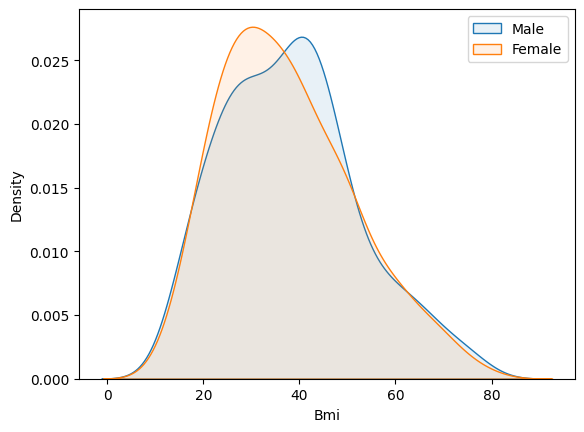

In [58]:
measuring_male = measuring[measuring['Gender']=='Male']
measuring_female = measuring[measuring['Gender']=='Female']
sns.kdeplot(measuring_male['Bmi'],alpha = 0.1,fill = True)
sns.kdeplot(measuring_female['Bmi'],alpha = 0.1,fill = True)
plt.legend(['Male','Female'])

+ There is a significant overlap between the two distributions, suggesting that a range of BMI values is shared by men and women.
+ The female distribution's peak looks to be slightly to the left of the male distribution's peak, indicating a central tendency. This implies that, on average, ladies in the dataset have lower BMI values than males.
+ It looks that the distribution of men is wider than that of women. This suggests that there is a wider range of BMI levels in men than in women.


# I have used this code to read the csv file of the diabetes data and shown the first 5 rows to check the dataset columns.

In [59]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [60]:
# Here i have round the BMI value to 1 so that it shows one decimal point.
# Then i have renamed the column name like title format where the first letter would be in uppercase.
diabetes['bmi'] = round(diabetes['bmi'],1)
diabetes = diabetes.rename(str.title, axis = 'columns')

In [61]:
# Here i have used the code change the datatype of the age into integer
diabetes['Age'] = diabetes['Age'].astype(int)

# Merged the diabetes and measuring data using the inner join  using the BMI and Gender columns

In [62]:
diabetes = diabetes.merge(measuring, how = 'inner', on = ['Bmi','Gender'])

# Showing the number of values that are present in the Diabetes data.

In [63]:
diabetes['Diabetes'].value_counts()

0    39589
1     4341
Name: Diabetes, dtype: int64

# Used to read the heart csv file and showing the first 5 rows and the columns present in the data.

In [64]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
diabetes.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight
0,Male,15,0,0,never,30.4,6.1,200,0,156,74
1,Male,65,0,0,not current,30.4,3.5,145,0,156,74
2,Male,54,0,0,No Info,30.4,5.0,158,0,156,74
3,Male,42,1,0,former,30.4,5.8,160,0,156,74
4,Male,65,0,1,former,30.4,4.8,158,0,156,74


# Renaming the columns for clear understanding of the data

In [66]:
heart.columns = ['Age', 'Gender', 'Chest_pain', 'Systole', 'Cholesterol', 'Diabetes', 'Resting_ECG','Max_HR', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Heart_Disease' ]

# Showing the heart data set that is renamed.

In [67]:
heart

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# The 0 and 1 values in the gender column is renamed into female and male and then it is attached to the dataset and showing the changed dataset.

In [68]:
heart_female = heart[heart['Gender']==0]
heart_male = heart[heart['Gender']==1]
heart_female['Gender'] = 'Female'
heart_male['Gender'] = 'Male'
gender = [heart_male,heart_female]
heart = pd.concat(gender,axis =0)
heart

<ipython-input-68-08d66707301e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_female['Gender'] = 'Female'
<ipython-input-68-08d66707301e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_male['Gender'] = 'Male'


,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,Male,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,Male,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,Female,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,Female,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,Female,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0


# Scatterplot is plotted for the follwing age and cholesterol column and this is differentiated using the target column that is heart disease and interpreted.

<Axes: xlabel='Age', ylabel='Cholesterol'>

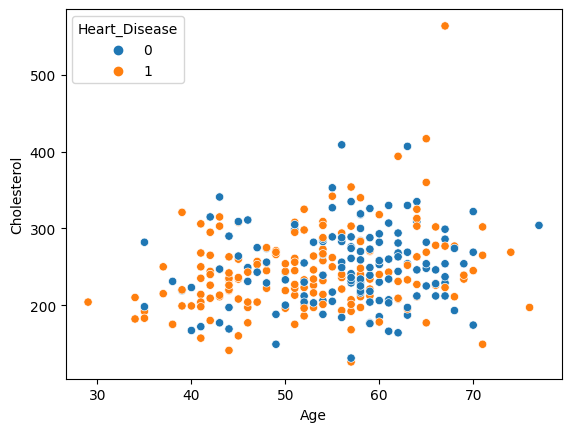

In [69]:
sns.scatterplot(x = heart['Age'], y = heart['Cholesterol'],hue = heart['Heart_Disease'])

Age, cholesterol, and heart disease are the three variables that are plotted in the scatter plot graph that I created. A patient is represented by each dot on the graph. Age, cholesterol, and heart disease status are displayed on the x- and y-axes, respectively, and are indicated by the color of the dot.

1. Age and cholesterol have a positive relationship. This indicates that
individuals' cholesterol tends to rise with age.
2. The risk of heart disease is positively correlated with cholesterol levels. This implies that heart disease is more common in those with greater cholesterol levels.
3. Accordingly, heart disease is more common in those whose cholesterol is higher.
Compared to younger people, elderly individuals have a larger range of cholesterol values. This suggests that in older adults, there is greater variation in cholesterol levels.


# Merging the diabetes data with the heart data with inner join using age, gender, diabetes, heart disease column and sorted by Hba1C_Level.
# Rounded the BMI to one.


In [70]:
heart = diabetes.merge(heart, how = 'inner', on = ['Age','Gender', 'Diabetes', 'Heart_Disease']).sort_values(by = 'Hba1C_Level')
diabetes['Bmi'] = round(diabetes['Bmi'],1)

# showing the datatype

In [71]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26709 entries, 0 to 13096
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               26709 non-null  object 
 1   Age                  26709 non-null  int64  
 2   Hypertension         26709 non-null  int64  
 3   Heart_Disease        26709 non-null  int64  
 4   Smoking_History      26709 non-null  object 
 5   Bmi                  26709 non-null  float64
 6   Hba1C_Level          26709 non-null  float64
 7   Blood_Glucose_Level  26709 non-null  int64  
 8   Diabetes             26709 non-null  int64  
 9   Height               26709 non-null  int64  
 10  Weight               26709 non-null  int64  
 11  Chest_pain           26709 non-null  int64  
 12  Systole              26709 non-null  int64  
 13  Cholesterol          26709 non-null  int64  
 14  Resting_ECG          26709 non-null  int64  
 15  Max_HR               26709 non-null 

In [72]:
# Droping the smoking history column from the data.
heart = heart.drop(columns = 'Smoking_History')

In [73]:
heart

,Gender,Age,Hypertension,Heart_Disease,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight,Chest_pain,Systole,Cholesterol,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal
0,Male,65,0,0,30.4,3.5,145,0,156,74,0,110,248,0,158,0,0.6,2,2,1
18026,Male,61,1,0,34.3,3.5,159,0,161,89,0,140,207,0,138,1,1.9,2,1,3
3387,Male,49,1,0,30.2,3.5,159,0,196,116,2,120,188,1,139,0,2.0,1,3,3
3388,Male,49,1,0,30.2,3.5,159,0,196,116,2,118,149,0,126,0,0.8,2,3,2
18025,Male,61,1,0,34.3,3.5,159,0,161,89,0,138,166,0,125,1,3.6,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19277,Male,53,0,0,32.9,9.0,159,1,150,74,0,140,203,0,155,1,3.1,0,0,3
19278,Male,53,0,0,32.9,9.0,159,1,170,95,0,140,203,0,155,1,3.1,0,0,3
19279,Male,53,0,0,36.9,9.0,280,1,178,117,0,140,203,0,155,1,3.1,0,0,3
26620,Male,61,0,1,21.2,9.0,155,1,155,51,2,150,243,1,137,1,1.0,1,0,2


# Checking the correlation between the BMI and the Cholesterol.

In [75]:
correlation = heart['Bmi'].corr(heart['Cholesterol'])
print(f"Correlation between Bmi and Cholesterol: {correlation}")

Correlation between Bmi and Cholesterol: -0.010746248862967708


# Rearranging the data inn ordernad removing the index

In [77]:
heart = heart[['Gender', 'Age', 'Height', 'Weight','Bmi', 'Max_HR', 'Systole','Hypertension', 'Cholesterol', 'Blood_Glucose_Level','Hba1C_Level',
          'Resting_ECG','Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Chest_pain', 'Diabetes', 'Heart_Disease']].reset_index()
del heart['index']
heart

,Gender,Age,Height,Weight,Bmi,Max_HR,Systole,Hypertension,Cholesterol,Blood_Glucose_Level,Hba1C_Level,Resting_ECG,Exercise_angina,Oldpeak,Slope,CA,Thal,Chest_pain,Diabetes,Heart_Disease
0,Male,65,156,74,30.4,158,110,0,248,145,3.5,0,0,0.6,2,2,1,0,0,0
1,Male,61,161,89,34.3,138,140,1,207,159,3.5,0,1,1.9,2,1,3,0,0,0
2,Male,49,196,116,30.2,139,120,1,188,159,3.5,1,0,2.0,1,3,3,2,0,0
3,Male,49,196,116,30.2,126,118,1,149,159,3.5,0,0,0.8,2,3,2,2,0,0
4,Male,61,161,89,34.3,125,138,1,166,159,3.5,0,1,3.6,1,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,Male,53,150,74,32.9,155,140,0,203,159,9.0,0,1,3.1,0,0,3,0,1,0
26705,Male,53,170,95,32.9,155,140,0,203,159,9.0,0,1,3.1,0,0,3,0,1,0
26706,Male,53,178,117,36.9,155,140,0,203,280,9.0,0,1,3.1,0,0,3,0,1,0
26707,Male,61,155,51,21.2,137,150,0,243,155,9.0,1,1,1.0,1,0,2,2,1,1


Pivoting the Data and using the Bmi as values and the age as index and gender column plotted the graph and labelled it accordingly.

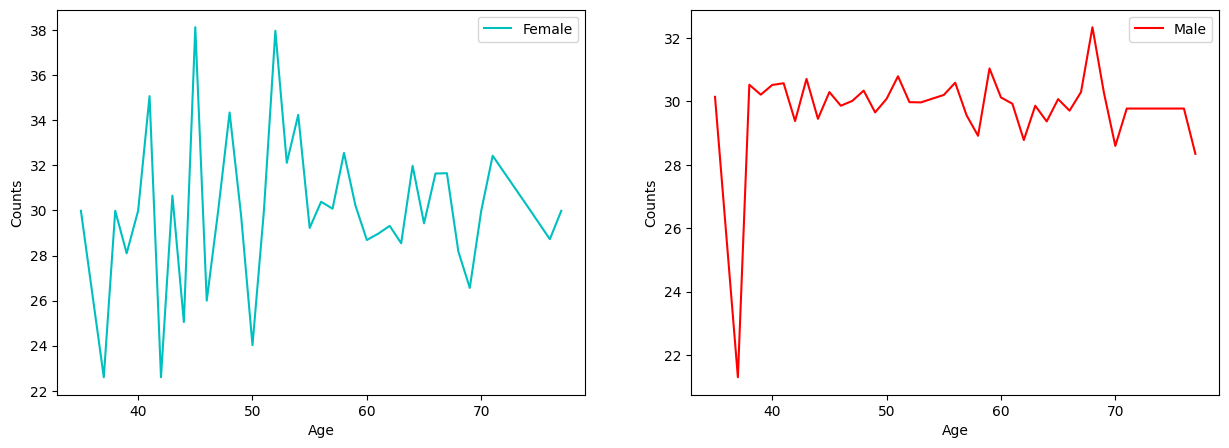

In [78]:
pivot_data = heart.pivot_table(values='Bmi', index='Age', columns='Gender', aggfunc='mean')
pivot_data['Female'] = pivot_data['Female'].fillna(np.mean(pivot_data['Female']))
pivot_data['Male'] = pivot_data['Male'].fillna(np.mean(pivot_data['Male']))
plt.subplot(1,2,1)
pivot_data.Female.plot(figsize=(15,5),c='c')
plt.legend(['Female'])
plt.ylabel('Counts')

plt.subplot(1,2,2)
pivot_data.Male.plot(figsize=(15,5),c='r')
plt.legend(['Male'])
plt.ylabel('Counts')
plt.show()

I've pivoted and displayed the "heart" dataset graph, which displays the average BMI for various genders and age groups.
1. For both genders, BMI tends to rise with age. For females in their 40s and 50s, this is particularly apparent.
2. Across all age groups, Male have a lower average BMI than Female.




# Rounding the Bmi as required

In [79]:
heart.columns
heart['Bmi'] = round(heart['Bmi'])

Pivotted the data and plotted the graph for different title like BMI distribution and Cholesterol Distribution.

Text(0.5, 1.0, 'Cholesterol Distribution')

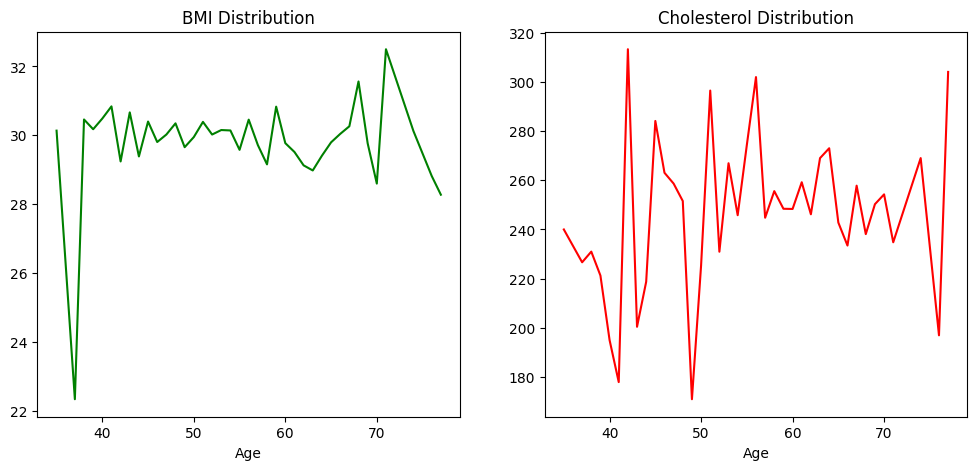

In [80]:
pivoted_data = heart.pivot_table(values=['Bmi', 'Cholesterol'], index='Age', aggfunc='mean')
# pivoted_data.plot(kind='bar')
plt.subplot(1,2,1)
pivoted_data.Bmi.plot(figsize=(12,5),c='g')
plt.title('BMI Distribution')
plt.subplot(1,2,2)
pivoted_data.Cholesterol.plot(figsize=(12,5), c='r')
plt.title('Cholesterol Distribution')

The body mass index (BMI) and cholesterol distribution over time are depicted in the graph. The distribution of BMI is depicted by the green line, and that of cholesterol by the red line.

1. The relationship between age and BMI is positive. This indicates that people's BMI tends to increase with age.
2. The BMI range of elderly individuals is more varied than that of younger individuals. This indicates that among older persons, there is greater variation in BMI values.
3. The relationship between cholesterol levels and age is not well-established.
4. The red line indicates that there is no general trend of cholesterol levels rising or falling with age; instead, they fluctuate up and down throughout time.
5. When it comes to all age groups, cholesterol levels are more widely distributed than BMI levels. This indicates that compared to BMI levels, cholesterol levels vary more.

Overall, this graph indicates a relationship between cholesterol levels, BMI, and age.


# Reading the csv file of icu heart prediction data

In [81]:
icu = pd.read_csv('icu_heart _patient.csv')

# Renaming the column name of gendera to gender and creating a function to replace the 1, 2   as male and female.

In [82]:
icu['gendera'] = icu['gendera'].replace(1,'Female')
icu['gendera'] = icu['gendera'].replace(2,'Male')
icu

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,Female,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,Male,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,Male,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,Male,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,Male,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,Female,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,Female,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,Male,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,Male,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [83]:
icu.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

# Renamed the name according to title format where the first letter of the column name is changed to upper case.

In [84]:
icu = icu.rename(str.title, axis = 'columns')

In [85]:
icu.columns = ['Group', 'Id', 'Outcome', 'Age', 'Gender', 'Bmi', 'Hypertensive',
       'Atrialfibrillation', 'Chd With No Mi', 'Diabetes', 'Deficiencyanemias',
       'Depression', 'Hyperlipemia', 'Renal Failure', 'Copd', 'Max_HR',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Respiratory Rate', 'Temperature', 'Sp O2', 'Urine Output',
       'Hematocrit', 'Rbc', 'Mch', 'Mchc', 'Mcv', 'Rdw', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'Pt', 'Inr',
       'Nt-Probnp', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium',
       'Chloride', 'Anion Gap', 'Magnesium Ion', 'Ph', 'Bicarbonate',
       'Lactic Acid', 'Pco2', 'Ef']

# Droping the unwanted columns and creating a new data usefull for the prediction.

In [86]:
icu = icu.drop(columns = ['Group', 'Id', 'Outcome','Hypertensive','Depression', 'Hyperlipemia', 'Renal Failure',
                    'Copd', 'Max_HR','Hematocrit', 'Rbc', 'Mch', 'Mchc', 'Mcv', 'Rdw', 'Leucocyte',
                    'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'Pt', 'Inr','Nt-Probnp',
                    'Chloride', 'Anion Gap', 'Magnesium Ion', 'Bicarbonate', 'Lactic Acid', 'Pco2'])

In [87]:
icu['Bmi'] = round(icu['Bmi'])

In [88]:
heart.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Bmi', 'Max_HR', 'Systole',
       'Hypertension', 'Cholesterol', 'Blood_Glucose_Level', 'Hba1C_Level',
       'Resting_ECG', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal',
       'Chest_pain', 'Diabetes', 'Heart_Disease'],
      dtype='object')

In [89]:
icu.columns

Index(['Age', 'Gender', 'Bmi', 'Atrialfibrillation', 'Chd With No Mi',
       'Diabetes', 'Deficiencyanemias', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Respiratory Rate', 'Temperature', 'Sp O2',
       'Urine Output', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium', 'Ph',
       'Ef'],
      dtype='object')

# Merging the icu data with the heart data with the age, gender, bmi, diabetes columns.

In [90]:
icu = icu.merge(heart, how = 'inner', on = ['Age','Gender', 'Bmi', 'Diabetes'])

In [91]:
icu.columns

Index(['Age', 'Gender', 'Bmi', 'Atrialfibrillation', 'Chd With No Mi',
       'Diabetes', 'Deficiencyanemias', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Respiratory Rate', 'Temperature', 'Sp O2',
       'Urine Output', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium', 'Ph',
       'Ef', 'Height', 'Weight', 'Max_HR', 'Systole', 'Hypertension',
       'Cholesterol', 'Blood_Glucose_Level', 'Hba1C_Level', 'Resting_ECG',
       'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Chest_pain',
       'Heart_Disease'],
      dtype='object')

# Plotting a histogram

<Axes: ylabel='Frequency'>

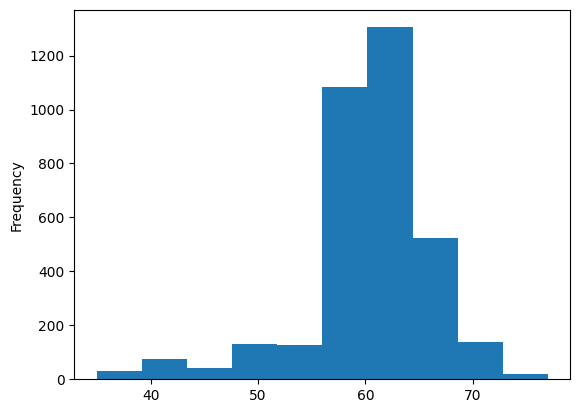

In [92]:
icu.Age.plot(kind ='hist')

The graph's x-axis displays the patients' ages, while the y-axis displays the total number of patients in that age group. The number of patients in each age range is displayed in the histogram's bars.

* The distribution of ages is roughly symmetrical, which means that there are about the same number of patients younger than 50 as there are patients older than 50

# showing the EF value counts that is different number of values in the EF.

In [93]:
icu.Ef.value_counts()

55    1857
50     435
75     348
35     196
30     142
60     142
20      90
40      86
45      85
25      61
15      35
Name: Ef, dtype: int64

## Pivoting the data to calculate average BMI for different conditions

## Visualization - Bar chart showing average BMI for different conditions

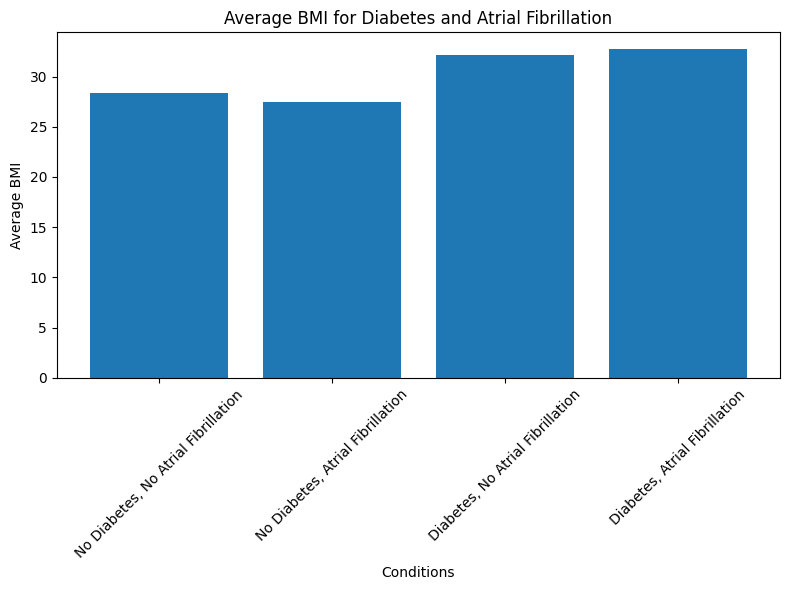

In [94]:
condition_bmi = icu.groupby(['Diabetes', 'Atrialfibrillation'])['Bmi'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(condition_bmi.index, condition_bmi['Bmi'])
plt.xlabel('Conditions')
plt.ylabel('Average BMI')
plt.title('Average BMI for Diabetes and Atrial Fibrillation')
plt.xticks(condition_bmi.index, ['No Diabetes, No Atrial Fibrillation',
                                 'No Diabetes, Atrial Fibrillation',
                                 'Diabetes, No Atrial Fibrillation',
                                 'Diabetes, Atrial Fibrillation'], rotation=45)
plt.tight_layout()
plt.show()

I have plotted the graph showing the average BMI and the conditions and we can see that:

1. People with both diabetes and atrial fibrillation have the highest average BMI.
2. People with diabetes but no atrial fibrillation have a lower average BMI than people with both conditions, but a higher average BMI than people with neither condition.
3. People with atrial fibrillation but no diabetes have a slightly higher average BMI than people with neither condition.
4. People with neither diabetes nor atrial fibrillation have the lowest average BMI.

* People with diabetes may be more likely to be overweight or obese than people without diabetes. This is because diabetes can cause insulin resistance, which makes it harder for the body to store glucose from food. When the body cannot store glucose, it is converted to fat and stored in the body.
* People with atrial fibrillation may also be more likely to be overweight or obese. This is because atrial fibrillation can lead to heart failure, which can cause fluid retention and weight gain.
* People with both diabetes and atrial fibrillation may be at the highest risk of being overweight or obese because they have both of the risk factors mentioned above.

# Pivoting the data to calculate average systolic blood pressure for CHD with no MI and without CHD

# Visualization - Box plot showing distribution of systolic blood pressure for CHD with no MI and without CHD

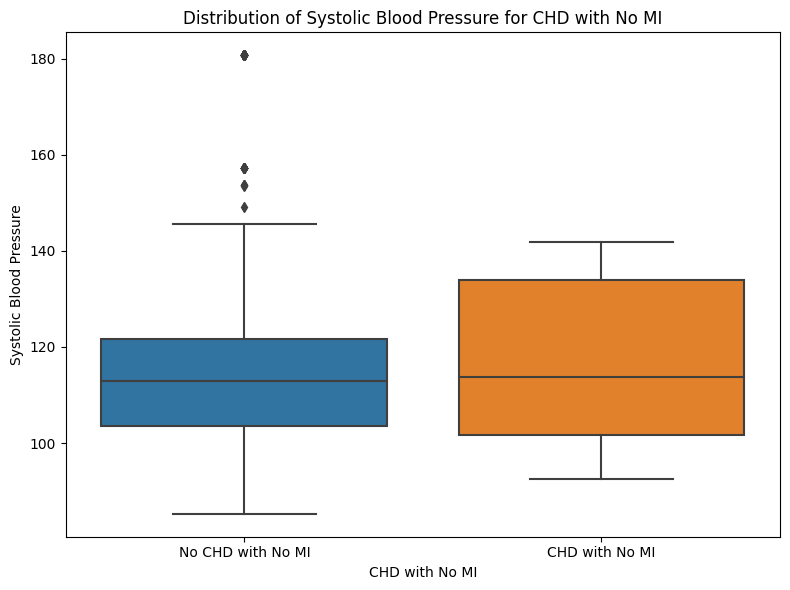

In [95]:
chd_sbp = icu.groupby('Chd With No Mi')['Systolic Blood Pressure'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Chd With No Mi', y='Systolic Blood Pressure', data=icu)
plt.xlabel('CHD with No MI')
plt.ylabel('Systolic Blood Pressure')
plt.title('Distribution of Systolic Blood Pressure for CHD with No MI')
plt.xticks([0, 1], ['No CHD with No MI', 'CHD with No MI'])
plt.tight_layout()
plt.show()

A box plot, which I used to plot the data, is a practical tool for displaying the distribution of the data for several groups. The distribution of systolic blood pressure for patients with and without coronary heart disease (CHD) who do not have a myocardial infarction (MI) is displayed in the ICU dataset.


**Systolic blood pressure median**: those with CHD without MI have a higher median systolic blood pressure (132 mmHg) than those without CHD (125 mmHg). This implies that systolic blood pressure is typically greater in those with CHD who do not have MI.

**Interquartile range (IQR)**: Patients with CHD without MI have a broader IQR than patients without CHD. The IQR is the middle 50% of the data. This indicates that among patients with CHD who do not have MI, there is a larger range of systolic blood pressure readings.

**Outliers**: The data contains a small number of outliers, especially for CHD patients without MI. The results that fall outside of the typical range of systolic blood pressure are represented by these outliers.




# The below code is used to plot the scatter plot between the cholesterol and BMI.

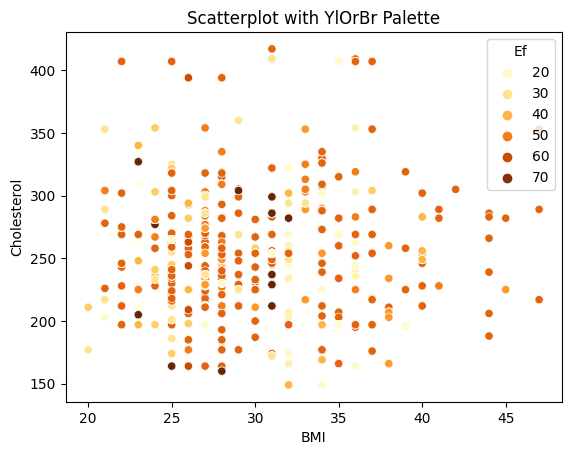

In [96]:
sns.scatterplot(x = icu['Bmi'], y = icu['Cholesterol'], hue = icu['Ef'], palette="YlOrBr")
plt.xlabel("BMI")
plt.ylabel("Cholesterol")
plt.title("Scatterplot with YlOrBr Palette")
plt.show()

Three variables from the ICU dataset are plotted: body mass index (BMI), cholesterol, and ejection fraction (EF).

A patient is represented by each point on the graph. The patient's BMI is displayed on the X-axis, their cholesterol is displayed on the Y-axis, and the point's color indicates their EF.

Using the "YlOrBr" color scheme, greater EF values are represented by orange and yellow, and lower EF values by green.


+ The relationship between cholesterol levels and BMI seems to be positive. This implies that cholesterol levels tend to rise together with an increase in BMI.
+ There are more points at the extremes of both axes than in the middle, where the points are rather crowded. This implies that the majority of patients in the dataset had cholesterol and BMI values that are modest.
+ A handful are out of the ordinary, especially in the graph's upper right quadrant. These people are characterized by elevated cholesterol and BMI.
+ According to the color distribution, patients with higher EF values typically have lower cholesterol and BMI levels, whereas patients with lower EF values typically have greater levels of both. This raises the possibility of a connection between EF and general health indicators.
